In [ ]:
import pandas as pd
import numpy as np
import zipfile

In [ ]:
local_zip='/content/69771e3c-b-dataset.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()


In [ ]:
df=pd.read_csv('/content/dataset/train.csv')
df.head()

,Month-year,CommodityID,Production weight (in million tonnes),Labour_availability,Govt_policy_change,Demand,Cost of production,Climatic factor 1,Climatic factor 2,Maximum price per kg,Minimum support price (in Rs./Quintal)
0,2020-06-01,CD117,42.65,Moderate,No,Low,68577.0,0,1,4407.0,6144
1,2013-10-01,CD71,93.96,Abundant,Yes,Short-run,12263.0,0,1,291.0,6564
2,2017-01-01,CD101,49.28,Moderate,No,Long-run,34924.0,0,1,1973.0,2440
3,2016-07-01,CD132,61.08,Moderate,No,Long-run,92940.0,1,0,782.0,1546
4,2014-04-01,CD76,49.91,Low,No,Very-low,64748.0,1,0,1713.0,8749


In [20]:
df['Year'] = pd.to_datetime(df['Month-year']).dt.year
df['Month'] = pd.to_datetime(df['Month-year']).dt.month
df['Day'] = pd.to_datetime(df['Month-year']).dt.dayofweek
df['woy'] = pd.to_datetime(df['Month-year']).dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
df.drop('Production weight (in million tonnes)',axis=1,inplace=True)
df.drop('Labour_availability',axis=1,inplace=True)
df.drop('Govt_policy_change',axis=1,inplace=True)
df.drop('Demand',axis=1,inplace=True)
df.drop('Cost of production',axis=1,inplace=True)
df.drop('Climatic factor 1',axis=1,inplace=True)
df.drop('Climatic factor 2',axis=1,inplace=True)
df.drop('Maximum price per kg',axis=1,inplace=True)
df.drop('Month-year',axis=1,inplace=True)

In [28]:
df.head()

,CommodityID,Minimum support price (in Rs./Quintal),Year,Month,Day,woy
0,20,6144,2020,6,0,23
1,111,6564,2013,10,1,40
2,3,2440,2017,1,6,52
3,37,1546,2016,7,4,26
4,116,8749,2014,4,1,14


In [43]:
df3=pd.read_csv('/content/dataset/commodityID_and_details.csv')
df3.head()

,CommodityID,Commodity_name
0,CD1,Paddy
1,CD2,Wheat
2,CD3,Jowar
3,CD4,Pearl millet
4,CD5,Maize


In [42]:
df2=pd.read_csv('/content/dataset/test.csv')
df2.head()

,Month-year,Commodity_name
0,2020-03-02,Tomato
1,2021-05-20,Radish
2,2020-10-27,Spray Chrysanthemum
3,2021-12-22,Brinjal
4,2021-10-14,Ginger


In [44]:
df4=pd.merge(df2,df3,on=['Commodity_name'])
df4.head()

,Month-year,Commodity_name,CommodityID
0,2020-03-02,Tomato,CD18
1,2021-05-20,Radish,CD24
2,2020-10-27,Spray Chrysanthemum,CD134
3,2021-12-22,Brinjal,CD20
4,2021-10-14,Ginger,CD16


In [46]:
df4['Year'] = pd.to_datetime(df4['Month-year']).dt.year
df4['Month'] = pd.to_datetime(df4['Month-year']).dt.month
df4['Day'] = pd.to_datetime(df4['Month-year']).dt.dayofweek
df4['woy'] = pd.to_datetime(df4['Month-year']).dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [48]:
df4.drop('Commodity_name',axis=1,inplace=True)
df4['CommodityID']=y.fit_transform(df4['CommodityID'])

In [21]:
df.drop('Production weight (in million tonnes)',axis=1,inplace=True)
df.drop('Labour_availability',axis=1,inplace=True)
df.drop('Govt_policy_change',axis=1,inplace=True)
df.drop('Demand',axis=1,inplace=True)
df.drop('Cost of production',axis=1,inplace=True)
df.drop('Climatic factor 1',axis=1,inplace=True)
#df.drop('cloud_level',axis=1,inplace=True)
df.drop('Climatic factor 2',axis=1,inplace=True)
df.drop('Maximum price per kg',axis=1,inplace=True)
df.drop('Month-year',axis=1,inplace=True)

In [ ]:
y=LabelEncoder()

In [27]:
df['CommodityID']=y.fit_transform(df['CommodityID'])

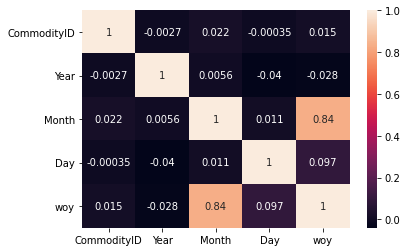

In [67]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [30]:
df1=df['Minimum support price (in Rs./Quintal)']
df.drop("Minimum support price (in Rs./Quintal)", axis = 1, inplace = True)


In [56]:
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [31]:
train_x,test_x,train_y,test_y=train_test_split(df,df1,test_size=0.25,random_state=2,shuffle=True)

In [69]:
model=LGBMRegressor()
model.fit(train_x,train_y)
o=model.predict(test_x)
print(100*max(0,1-mean_squared_log_error(test_y,o)))


73.17460422724696


In [61]:
df7=pd.DataFrame(pre)
df7.head()

,Month-year,Commodity_name,Minimum support price (in Rs./Quintal)
0,2020-03-02,Tomato,5818.339632
1,2021-05-20,Radish,5139.850841
2,2020-10-27,Spray Chrysanthemum,4759.299370
3,2021-12-22,Brinjal,5420.242788
4,2021-10-14,Ginger,4797.529178


In [62]:
df7.to_csv('tiktok1.csv')